In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns

In [27]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [28]:
train_dir = r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\ct\Training"
test_dir = r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\ct\Testing"

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.


In [32]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # IMPORTANT for correct prediction order
)

Found 1311 images belonging to 4 classes.


In [33]:
# Dynamic number of classes based on dataset
num_classes = train_data.num_classes

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # <- Fix: match number of classes!
])


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,700 (84.86 MB)

 Trainable params: 22,245,700 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Epoch 1/10


C:\Users\anany\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.5669 - loss: 1.0621 - val_accuracy: 0.7437 - val_loss: 0.8306
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.7895 - loss: 0.5632 - val_accuracy: 0.8063 - val_loss: 0.5062
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.8227 - loss: 0.4619 - val_accuracy: 0.8215 - val_loss: 0.4544
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.8510 - loss: 0.3809 - val_accuracy: 0.8383 - val_loss: 0.4777
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.8752 - loss: 0.3315 - val_accuracy: 0.8711 - val_loss: 0.3269
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.8770 - loss: 0.3093 - val_accuracy: 0.8680 - val_loss: 0.3922
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.8975 - loss: 0.2757 - val_accuracy: 0.8680 - val_loss: 0.3979
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9095 - loss: 0.2493 - val_accuracy: 0.906

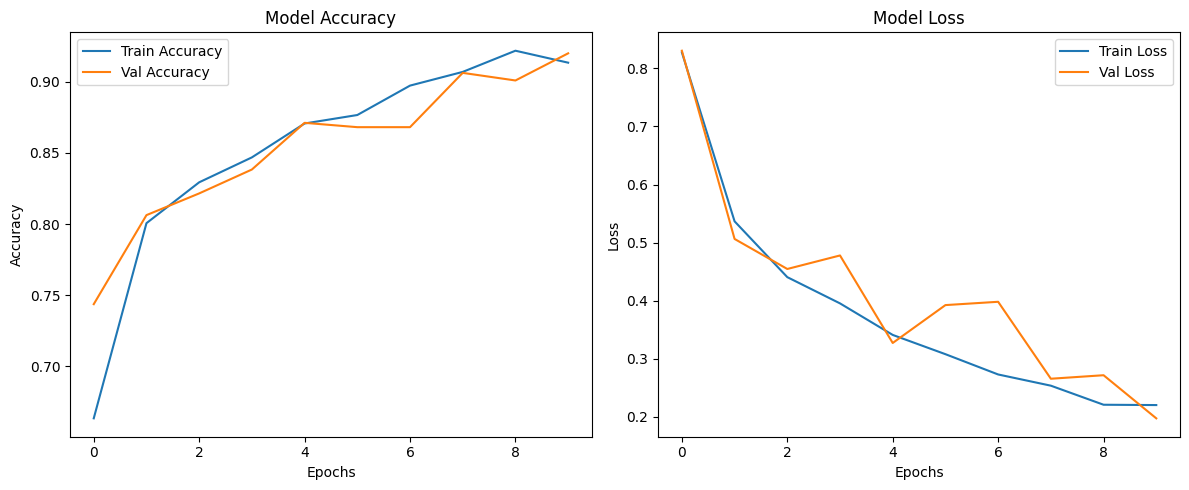

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
pred_probs = model.predict(test_data)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())


41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step


In [39]:
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))



Classification Report:

              precision    recall  f1-score   support

      glioma       0.93      0.91      0.92       300
  meningioma       0.91      0.75      0.82       306
     notumor       0.90      1.00      0.95       405
   pituitary       0.95      1.00      0.97       300

    accuracy                           0.92      1311
   macro avg       0.92      0.91      0.92      1311
weighted avg       0.92      0.92      0.92      1311



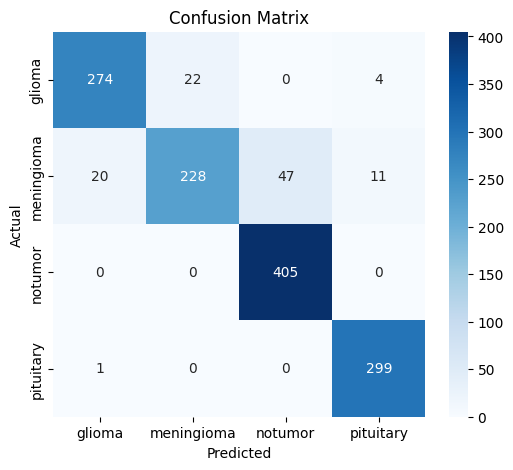

In [40]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")


F1 Score: 0.9170
Precision: 0.9201
Recall: 0.9199


In [46]:
def classify_tumor_image(img_path, model, class_labels):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # normalize

    # Predict
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]
    confidence = np.max(prediction)
    print(f"\nPredicted Tumor Type: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    plt.imshow(img)
    plt.title(f"{predicted_class} ({confidence*100:.1f}%)")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step

Predicted Tumor Type: glioma
Confidence: 0.99


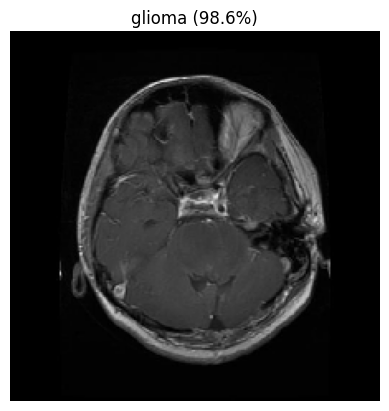

In [49]:
classify_tumor_image(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\ct\Testing\glioma\Te-gl_0010.jpg", model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

Predicted Tumor Type: meningioma
Confidence: 0.84


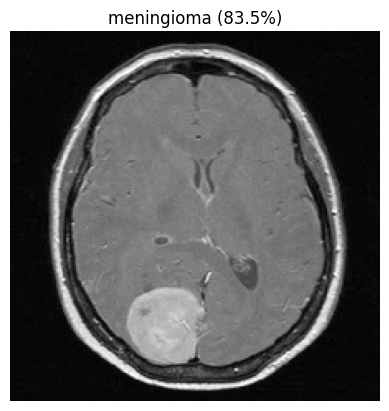

In [50]:
classify_tumor_image(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\ct\Testing\meningioma\Te-me_0010.jpg", model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step

Predicted Tumor Type: pituitary
Confidence: 1.00


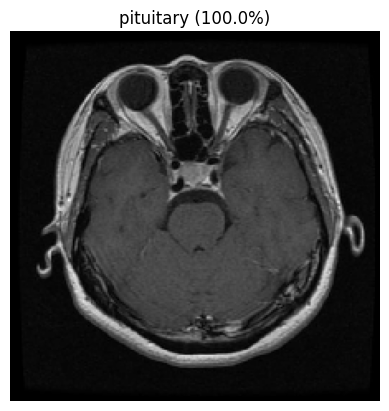

In [51]:
classify_tumor_image(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\ct\Testing\pituitary\Te-pi_0011.jpg", model, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

Predicted Tumor Type: notumor
Confidence: 0.95


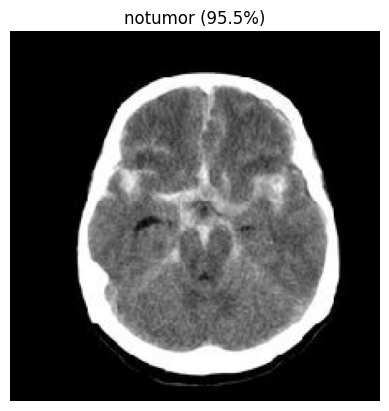

In [52]:
classify_tumor_image(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\ct\Testing\notumor\Te-no_0011.jpg", model, class_labels)